<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday November 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.  We will happily discuss ideas on your paper, however.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Kelley Kelley

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Short Paper](#p2) | [Bottom](#bot)

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Part 1: The Traveling Salesman

Run the following cell to generate the data set, which is saved in the `df` dataframe by default.  You may change it to a dictionary/matrix/whatever typing you see fit.  The x and y axis are in miles, and you may assume that any pairwise distances computed are Euclidean distance

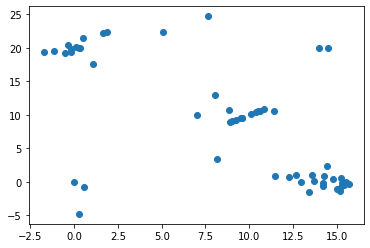

In [2]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])
plt.show()

### Part A) Warmup: Rehash on A*

Turn the set of points into a graph by adding edges.  For each point, add two edges that connect that point two the nearest two other points.  Note that some points might end up with more than 3 edges, but many edges won't have to be added because nearest-other-points will often be symmetric.  After doing this, perform the $A^*$ algorithm to find the shortest path from the point at (0,0) to the point at (14,20).  Print out the path followed (as a list of coordinate pairs) and the total Euclidean distance.

Note: you probably want:
    - i) a quick function or dictionary or matrix that stores or computes the distances between two input points
    - ii) a function that computes the total distance of a path: given a list of nodes/vertices, uses the i) function to compute it's total edge cost

In [1]:
#add edges
#create edge dictionary?
#create path function?

# when I just do the dataframe the indices are wrong
#print(df)
# so I'm going to loop over every row with my own indexer to make it a dictionary with nice numbered points
i = 0
points = {}
# turning dataframe to dictionary one row at a time
for index, row in df.iterrows():
    points[str(i)] = (row['x'], row['y'])
    # also select our start and end node since it's easiest to do here
    ''' found it so don't need this anymore
    if row['x'] == 0 and row['y'] == 0:
        print(i)
    if row['x'] == 14 and row['y'] == 20:
        print(i)
    '''
    i += 1
#print(points[44])
#print(points[45])
start = '45'
end = '44'
#print(points)
# I guess with how I've done it an array of tuples would be more efficient but oh well 

# now a distance computer from two points
def distance(point1, point2):
    # did math.sqrt but not import so fance **.5 which is a little weird to me, we can probably use math but oh well
    return (( (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 )**.5)
# testing disctance function
'''
print(points[0])
print(points[1])
print(distance(points[0], points[0]))
print(distance(points[0], points[1]))
print(distance(points[1], points[0]))
'''
# maybe I should divide this into more cells it's getting a little long

# a total path distance calculator, takes in a list of point identifiers for points dictionary that is the path taken
def pathdistance(path):
    pathcost = 0
    for i in range(len(path)-1):
        # add to the pathcost the distance from the current node to the next node in the list
        pathcost += distance(points[path[i]], points[path[i+1]])
    return pathcost

#print(pathdistance([0,0]))
#print(pathdistance([0,1,0]))
# perfect cool
# now gotta add a bunch of edges to stuff so we have an actual graph
# the edge graph
edge_graph = {}
# wait this is kinda complicated, wait no it's not
# go through everything in points and find the two closest things and put those in its edge_graph
for node in points:
    # gonna store the distances to every node then take the closest two and append them to edge_graph 
    distances = []
    for point in points:
        if not point == node: #skip distance to itself that's stupid
            distances.append((str(point), distance(points[node], points[point])))
    # sort distances
    distances.sort(key = lambda x: x[1])
    # append to edge graph closest two points to this node
    # append it in such a way that i can copy paste astar from hw2
    # but we also need to add the edge on the other node so this gets a little complicated
    # have to check if it exists already, if not add it, if it does update it with another connection
    if node in edge_graph:
        edge_graph[node][distances[0][0]] = distances[0][1]
        edge_graph[node][distances[1][0]] = distances[1][1]
    else:
        edge_graph[node] = {distances[0][0]: distances[0][1], distances[1][0]: distances[1][1]}
    if distances[0][0] in edge_graph:
        edge_graph[distances[0][0]][node] = distances[0][1]
    else:
        edge_graph[distances[0][0]] = {node: distances[0][1]}
    if distances[1][0] in edge_graph:
        edge_graph[distances[1][0]][node] = distances[1][1]
    else:
        edge_graph[distances[1][0]] = {node: distances[1][1]}

# add the two in addendum so it's solvable
edge_graph['0']['45'] = distance(points['0'], points['45'])
edge_graph['45']['0'] = distance(points['0'], points['45'])
edge_graph['29']['45'] = distance(points['29'], points['45'])
edge_graph['45']['29'] = distance(points['29'], points['45'])


#print(edge_graph)
# now for astar to work i need to do the heuristic which is going to be euclidean distance
heuristic_graph = {}
# iterate every point and append how far it is from our goal
for point in points:
    heuristic_graph[point] = distance(points[point], points[end])
    
#print(heuristic_graph)

# wanted to check if my edge_graph is correct to the image in addendum so I copied a function implementation
# but it's unrelated to the solution and I'm even going to comment it out
# I guess techinically I could just delete this from the notebook and no one would ever know but I want to leave it
# in for future me
# https://stackoverflow.com/questions/35363444/plotting-lines-connecting-points
# their implementation didn't work with my setup so didn't even copy nevermind
plt.scatter(df['x'],df['y'])
def connectpoints(p1, p2):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')

for node in edge_graph:
    for connect in edge_graph[node]:
        connectpoints(points[node], points[connect])

plt.show()
# wow, it actually looks the same, go me 

# now time to do astar
# now, I could redo the whole thing and be a good person, but I spent forever formatting it so it would work
# with hw2's implementation and I say that is good enough and took forever so I give up and
# really need to move on, and this is my own work just from a few weeks ago
# and I did have to redo the frontier class since we can't use heapq

def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

class Frontier_PQ:
    
    # initialize states and q in the frontier class
    # states are explored q is the sorted list of current possible paths
    def __init__(self, start, cost):
        self.states = {start:cost}
        self.q = []
    
    # add a possible path to our sorted heap / the frontier
    def add(self, state, cost):
        # since we can't use heapq its a list that we just sort on the first element in the tuple
        self.q.append((cost, state))
        self.q.sort(key = lambda x: x[0])
    
    # move from our frontier to our explored and return the lowest element
    # from our frontier
    def pop(self):
        # since we can't use heapq its a list that we just sort on the first element in the tuple
        lowest = self.q[0]
        self.q = self.q[1:]
        self.states[lowest[1]] = lowest[0]
        return lowest
    
    # replace a frontier path with a better path
    # I also return True or False because this will make
    # UCS easier 
    def replace(self, state, cost):
        for i in range(0, len(self.q)):
            if self.q[i][1] == state:
                # make sure the path is actually better
                if self.q[i][0] > cost:
                    # since we can't use heapq its a list that we just sort on the first element in the tuple
                    self.q[i] = (cost, state)
                    self.q.sort(key = lambda x: x[0])
                    return True
                else:
                    return False
    
    # just a helper function for testing frontier class
    def test(self):
        print(self.states, self.q)
    
# this is the UC we made for 3a except we add the heuristic to the cost
# whereever you see pathcost being called just also call heuristic and add it to the cost
def astar_search(start, goal, state_graph, heuristic, return_cost, return_nexp):
    # error checking
    if goal not in state_graph or start not in state_graph:
        return "Error"
    # if our goal is where we started then easy
    if start == goal:
        if return_cost:
            if return_nexp:
                return ([start], 0, 0)
            return ([start], 0)
        if return_nexp:
            return ([start], 0)
        return [start]
    # initialize our frontier
    frontier = Frontier_PQ(start, 0)
    # initialize our paths
    notpath = {start:None}
    # get all the nodes next to the start and put them into the frontier
    for node in state_graph[start]:
        frontier.add(node, pathcost([start, node], state_graph) + heuristic[node])
        notpath[node] = start
    expanded = 1
    # keep going until we return
    while True:
        #print('paths:', notpath, '--------------')
        # get the lowest cost path
        node_tuple = frontier.pop()
        #print(node_tuple)
        # how many nodes we've expanded
        expanded += 1
        #print(node_tuple)
        # if it was our goal then we have made it return the stuff
        if node_tuple[1] == goal:
            truepath = path(notpath, goal)
            if return_cost:
                if return_nexp:
                    return (truepath, pathcost(truepath, state_graph), expanded)
                return (truepath, frontier.states[goal])
            if return_nexp:
                return (truepath, expanded)
            return truepath
        # add all the new possible nodes to the frontier if we haven't already explored them
        for node in state_graph[node_tuple[1]]:
            #print(node)
            # if we've already found the shortest path to our node then skip it
            if not node in frontier.states:
                # now we check if the node already has a path and needs to be replaced or added
                if not node in notpath:
                    # it didn't exist yet so add it to our frontier
                    frontier.add(node, node_tuple[0] + pathcost([node_tuple[1], node], state_graph) + heuristic[node])
                    # also add how we got there to notpath
                    notpath[node] = node_tuple[1]
                # if it did already exist then we need to replace instead
                # this is why I added a return to replace, this just sends every possibility to replace
                # if it was actually better then replace will return True and therefore
                # we need to update notpath because this path was better, otherwise do nothing since 
                # this path was worse
                elif frontier.replace(node, node_tuple[0] + pathcost([node_tuple[1], node], state_graph) + heuristic[node]):
                    notpath[node] = node_tuple[1]
                    

# astar returns in the wrong format so gotta reformat it
path, cost = astar_search(start, end, edge_graph, heuristic_graph, True, False)
actualpath = []
for node in path:
    actualpath.append(points[node])
print('path =', actualpath)
print('cost =', cost)
    
#do A*
#print path

NameError: name 'df' is not defined

### Part B) Annealing: the Salesman

In this exercise, we're going to be using simulated annealing to find solutions to the traveling salesman problem.Your two helper functions in part A should help!

In this problem, we model a salesman that tries to "reach" each city on the graph to sell their wares.  As an algorithm, the goal of the traveling salesman problem is to find the path that:
    - has the lowest total edge length (or path cost)
    - hits each and every vertex/node exactly once
    - the salesman may travel directly between *any* two cities (you will need more edges than you constructed in part A!)

We will use simulated annealing.  This means you need to come up with both a temperature function and a probability of acceptance function.  There is no guidance on these functions beyond:
    - Given a path or solution to the problem, the temperature function proposes a new solution.
    The new solutions should become more and more like the input solutions over time/as you run more iterations
    - Given two solutions, the annealing algorithm will always accept one with a shorter path cost, and will have some probability that scales with temperature/iterations and becomes less and less likely to accept a new solution with longer path cost.
    - All proposed solutions should pass through every node.
    - There are many methods to "adjust" old solutions to propose new ones.  You should consider moving a single node to another location in the list, moving entire substrings to other locations, reversing the order of substrings, etc.
    
For any temperature/probability function pair, make sure you run annealing for sufficiently different initial conditions to generate a small sample of "final solution lengths" and "number of iterations."

Typeset and describe in exact detail how you chose and implemented temperature and probability functions in the markdown cell below.


(desribe YOUR implementation *here*)

I'll try 2 temperature functions. One will be the proposed function from class 
$$
T(t) = \frac{1}{(t+1)^3}
$$
The other will decay slowly in the beginning and decay rapidly at the end, the reverse of the first.
$$
T(t) = log_{10}(-.89 * t + 1) + 1
$$
Both of these when 0 <= x <= 1 produce y's from 1 to 0 which will allow for ease of use explained later on. 

There are 4 functions I'll implement for generating new solutions.

1: Move a node to another random location in the path. The temperature will determine how many nodes away from its current location it can be moved to in the path. 

2: Move an entire substring to another location in the path. The size of the substring and the distance of the substring that can be moved will be determined by the temperature function.

3: Reverse the order of a substring. The temperature function will determine how large the substring you can reverse is.

4: Swap two nodes. The distance apart these nodes can be swapped will be determined by the temperature function and will use euclideon distance of the two nodes rather than distance in the path.

Since both of our temperature functions span from 1 to 0, the maximum acceptable distance the change can happen from the 4 methods above will be the maximum possible distance * T(t). This means as temperature decays the maximum distance we can make a change decays with it. Also, in order for T(t) to make since, t will need to be current iteration/max iterations so it stays between 0 and 1 so the temperature function works as intended. 

(1)
If the proposed solution is better than the current, we will accept it. If not, we will accept it with probability
$$
exp(\frac{pathcost current state - pathcost proposed state}{T(t)})
$$
where the numerator is the path quality.

We will use pathcost implemented in the Astar part of the assignment to get the pathcost of a state.

Now that we have a method of generating new problems and probability we accept bad ones, we can implement simulated annealing.

The method will be passed a starting state, the max number of iterations, the temperature function to use, and the function for generating a new solution. Repeat the following until you reach the max number of iterations: 

generate a new solution using the method for generating new solutions passed, and pass the generation method the maximum acceptable distance a solution can be generated using the temperature function as described before.

if the solution is better repeat with the new solution

if not then accept it using the method described in (1)

once max iterations have been reached return the final accepted solution

For evaluation we will run all combinations of temperature and generation methods with the same initial state and keep track of the total pathcost at each iteration and plot them to see how quickly each method approached a solution, the final pathcost, and plot the final path.

### Part C) Annealing Implementation

In [4]:
##Code cell: implement annealing!  Include any trial runs for different temperature/prob functions. 
def temperature_1(t):
    return 1.0/(t+1.0)**3.0

def temperature_2(t):
    return np.log10(-.89*t+1.0)+1.0

def move_node(path, temperature):
    # first pick a random node in the path
    node1 = np.random.randint(len(path))
    # then pick how far away we are from the node
    # we can go plus or minus so have to adjust for that
    # do it by multiplying by 2 then subtracting the max distance
    node2 = np.random.randint(temperature*len(path)*2)
    node2 = node2 - (temperature*len(path))
    # now actually make the distance relative to our node
    node2 = node1 + node2
    # node1 is the node we are moving node2 is where we are moving it to
    # so delete node1 then move it to node2 position
    # maker sure we are in bounds of the array, if we go out of bounds then just do the maximum/minimum
    if node2 > len(path):
        node2 = len(path)-1
    elif node2 < 0:
        node2 = 0
    temp = path[node1]
    del path[node1]
    path.insert(int(node2), temp)
    return path
    
def move_substring(path, temperature):
    # choose a random size
    size = np.random.randint(len(path)*temperature)
    # choose a distance to move it
    distance = np.random.randint(len(path)*temperature*2)
    distance = distance - (temperature*len(path))
    distance = int(distance)
    # choose a point to start the substring from
    startpoint = np.random.randint(len(path))
    # find the end of the substring
    endpoint = startpoint + size
    # make the new path and return it
    substring = path[startpoint:endpoint]
    path = path[:startpoint] + path[endpoint:]
    # we've extracted the substring so now we can move it distance away
    # by just inserting the substring at startpoint + distance since
    # startpoint is the index at which the substring was extracted and
    # since it's been extracted it encompasses the end of the substring as well
    distance = distance + startpoint
    # check if out of bounds of the new path
    if distance > len(path):
        distance = len(path)
    if distance < 0:
        distance = 0
    # insert the substring at our point by splitting path into whats in front of the substring and whats behind it
    path = path[:distance] + substring + path[distance:]
    return path
    
def reverse(path, temperature):
    # thank god this one is simpler
    # choose a random starting point
    startpoint = np.random.randint(len(path))
    # choose a random size
    size = np.random.randint(len(path)*temperature)
    # extract that substring
    endpoint = startpoint + size
    if endpoint > len(path):
        endpoint = len(path)
    substring = path[startpoint:endpoint]
    # reverse it
    substring.reverse()
    # insert it back in reversed
    path = path[:startpoint] + substring + path[endpoint:]
    # return path
    return path

# this finds the greatest two points are from each other for use in swap
furthest_apart = 0
for node in points:
    for checking in points:
        the_distance = distance(points[node], points[checking])
        if the_distance > furthest_apart:
            furthest_apart = the_distance
    
def swap(path, temperature):
    # simplest yay
    # this one needs a special largest distance calculated above
    # only do this 50 times at most since you could theoretically get
    # distances that are never acceptable from this method
    for i in range(50):
        # choose two random points
        point1 = np.random.randint(len(path))
        point2 = np.random.randint(len(path))
        if distance(points[path[point1]], points[path[point2]]) < temperature * furthest_apart:
            temp = path[point1]
            path[point1] = path[point2]
            path[point2] = temp
            return path
    return path
    
# that was a lot, lets hope it worked
all_nodes = list(points.keys())
np.random.shuffle(all_nodes)

def simulated_annealing(starting_state, max_iters, temperature_function, generator_function):
    # save our answer
    answer = starting_state.copy()
    # also we are going to save the pathcost at each iteration for plotting later
    patch_cost = []
    for i in range(max_iters):
        # get our proposed solution from generator
        # note generator's take in a value from the temperature function not
        # the temperature function so we convert it here for passing
        proposal = generator_function(answer.copy(), temperature_function(i/max_iters))
        # if it's better than accept it
        if pathdistance(proposal) < pathdistance(answer):
            answer = proposal
        else:
            # calculate the probability we accept
            p_accept = np.exp((pathdistance(answer)-pathdistance(proposal))/temperature_function(float(i)/float(max_iters)))
            # decide if we accept or not
            accept = np.random.choice([True, False], p=[p_accept, 1-p_accept])
            if accept:
                answer = proposal
        # append our cost to pathcost for returning
        patch_cost.append(pathdistance(answer))
    # return the path and cost at each iteration
    return answer, patch_cost
    
# finally time to run and test
# im worried af
# fixed passing float as index
# fixed typo
# fixed that temp gives doubles which means math comes to doubles but need ints
# fixed sizze
# wait what
# no errors and no you goofeds
iterations = 1000
path1, costs1 = simulated_annealing(all_nodes, iterations, temperature_1, move_node)
path2, costs2 = simulated_annealing(all_nodes, iterations, temperature_1, move_substring)
path3, costs3 = simulated_annealing(all_nodes, iterations, temperature_1, reverse)
path4, costs4 = simulated_annealing(all_nodes, iterations, temperature_1, swap)
path5, costs5 = simulated_annealing(all_nodes, iterations, temperature_2, move_node)
path6, costs6 = simulated_annealing(all_nodes, iterations, temperature_2, move_substring)
path7, costs7 = simulated_annealing(all_nodes, iterations, temperature_2, reverse)
path8, costs8 = simulated_annealing(all_nodes, iterations, temperature_2, swap)
# making sure we visit every node, never printed so yay
for node in all_nodes:
    if not node in path1:
        print('you goofed 1')
    if not node in path2:
        print('you goofed 2')
    if not node in path3:
        print('you goofed 3')
    if not node in path4:
        print('you goofed 4')
    if not node in path5:
        print('you goofed 5')
    if not node in path6:
        print('you goofed 6')
    if not node in path7:
        print('you goofed 7')
    if not node in path8:
        print('you goofed 8')
        
''' well they all look like paths and all_nodes didnt change so yay, time for some data
print(all_nodes)
print(path1)
print(path2)
print(path3)
print(path4)
print(path5)
print(path6)
print(path7)
print(path8)
print(all_nodes)
for some reason prints these comments which scared the crap out of me
'''
print('done')

done


### Part D) Conclusions
Create a visualization - box plots, line graphs, histograms, etc. of how your temperature/probability functions performed. Which one did best?  Plot the path corresponding to the shortest edge length that you found, and state its path length.  How many iterations were necessary *on average* for the temperature/probability pair that gave you your shortest edge length?

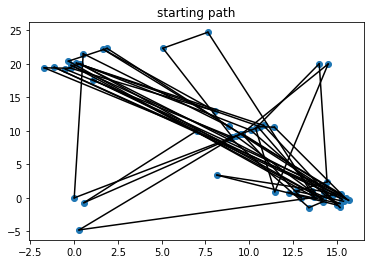

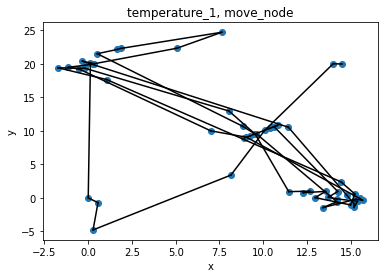

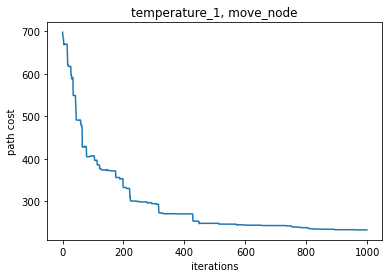

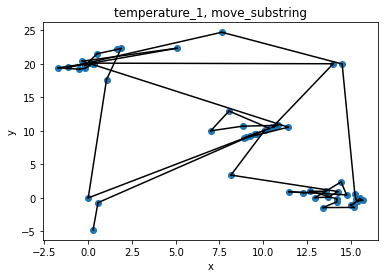

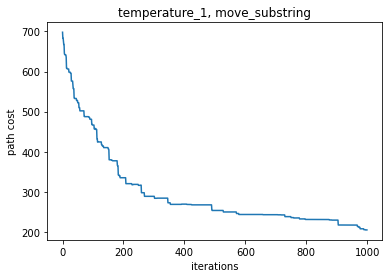

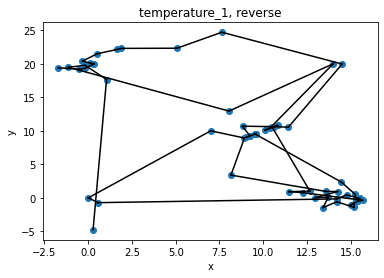

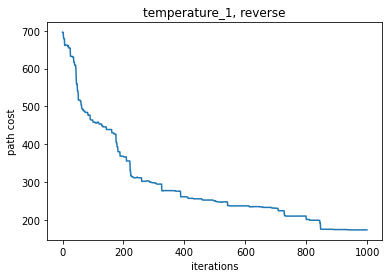

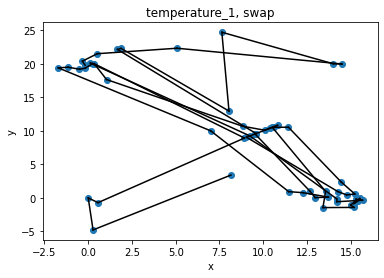

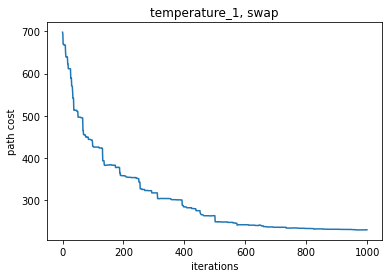

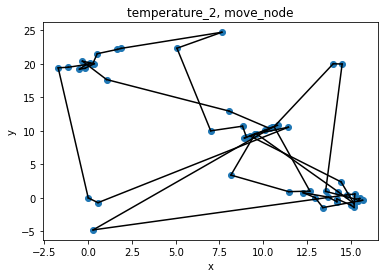

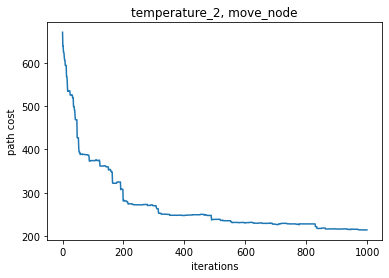

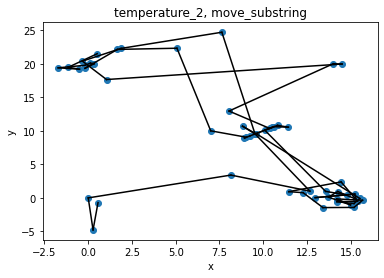

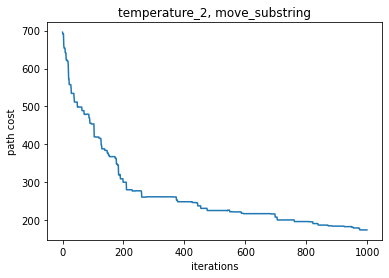

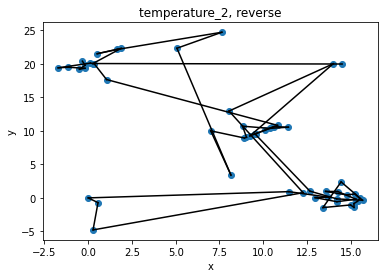

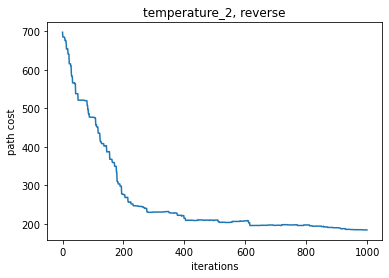

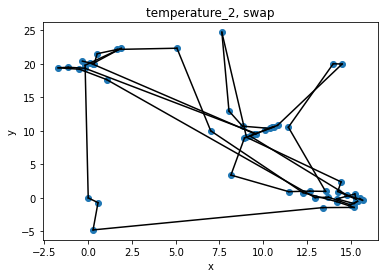

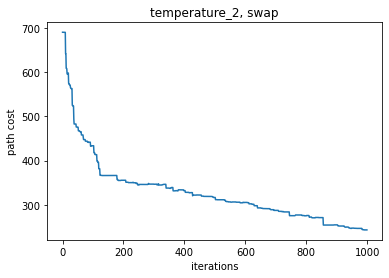

temperature_1, move_node = 232.94153088943656
temperature_1, move_substring = 204.71858263609317
temperature_1, reverse = 173.20553187645422
temperature_1, swap = 230.34001783028282
temperature_2, move_node = 214.40722276752714
temperature_2, move_substring = 174.80882471817813
temperature_2, reverse = 184.0054955658405
temperature_2, swap = 242.78344610931808


In [5]:
#visualization of success times/paths of different implementations, plot of shortest path found
# so now for everything we did above plot the path it took and the pathcost at each iteration

def do_a_plot(name, path, costs):
    plt.scatter(df['x'],df['y'])
    for i in range(len(path)-1):
        plt.plot([points[path[i]][0], points[path[i+1]][0]], [points[path[i]][1], points[path[i+1]][1]], 'k-')
    plt.title(name)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    plt.plot(costs)
    plt.title(name)
    plt.ylabel('path cost')
    plt.xlabel('iterations')
    plt.show()

plt.scatter(df['x'],df['y'])
for i in range(len(all_nodes)-1):
    plt.plot([points[all_nodes[i]][0], points[all_nodes[i+1]][0]], [points[all_nodes[i]][1], points[all_nodes[i+1]][1]], 'k-')
plt.title('starting path')
plt.show()
    
do_a_plot('temperature_1, move_node', path1, costs1)
do_a_plot('temperature_1, move_substring', path2, costs2)
do_a_plot('temperature_1, reverse', path3, costs3)
do_a_plot('temperature_1, swap', path4, costs4)
do_a_plot('temperature_2, move_node', path5, costs5)
do_a_plot('temperature_2, move_substring', path6, costs6)
do_a_plot('temperature_2, reverse', path7, costs7)
do_a_plot('temperature_2, swap', path8, costs8)

final1 = costs1[len(costs1)-1]
final2 = costs2[len(costs2)-1]
final3 = costs3[len(costs3)-1]
final4 = costs4[len(costs4)-1]
final5 = costs5[len(costs5)-1]
final6 = costs6[len(costs6)-1]
final7 = costs7[len(costs7)-1]
final8 = costs8[len(costs8)-1]
print('temperature_1, move_node =', final1)
print('temperature_1, move_substring =', final2)
print('temperature_1, reverse =', final3)
print('temperature_1, swap =', final4)
print('temperature_2, move_node =', final5)
print('temperature_2, move_substring =', final6)
print('temperature_2, reverse =', final7)
print('temperature_2, swap =', final8)

(discussion/wrapup *here*)
Turns out that there really isn't much of a different between any of these methods. Sometimes temperature1 performs better sometimes temperature2 performs better. All of the methods also are pretty random in how good they are. Either all these methods are bad or it doesn't matter which of the methods you pick really. Temperature2 does appear to be slightly better on average, but no significant amount. Also generator function 2 and 3 perform slightly better than 1 and 4 on average. All of them though have similar graphs showing a similar trend in how quickly they approach a solution. From 1000 to 3000 iterations there isn't much improvement. However all of the methods run really quick so it's not like there's any issue with increasing the iterations. I did 10,000 iterations on each method and none of them performed significantly better than 3000 or even 1000 iterations. Although, generator function 1 and 4 are definetly inferior to methods 2 and 3. And temperature 1 is inferior to temperature 2. The best performing pretty consistently is using the reverse method with temperature 2. The best path I ever got was with this and it was a total cost of 91.20314157823212 and the path was ['52', '20', '26', '29', '21', '22', '31', '23', '24', '30', '25', '28', '27', '51', '54', '56', '44', '49', '48', '46', '41', '42', '36', '43', '34', '35', '33', '40', '32', '38', '47', '39', '37', '6', '8', '9', '18', '19', '2', '3', '5', '15', '17', '1', '7', '12', '13', '4', '11', '16', '14', '10', '0', '50', '45', '55', '53'] and based upon it's graph it looks like a really reasonable path to take and like it is at least close to the optimal solution. (Graph shown below)

I think it would be cool to combine the methods. For example, start with swap and as temperature decays move to reversing or moving substrings to see if different generation methods perform better at different points.

I set the implementation back to 1000 iterations so it doesn't take long to run and since the general idea can be reached with 1000 iterations. It can easily be changed by setting the iterations variable to another number.

best path cost = 91.20314157823212


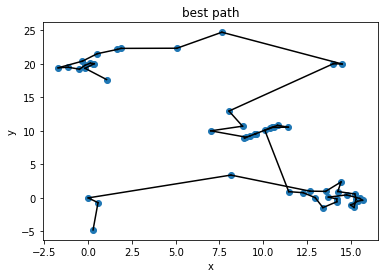

In [6]:
best_path = ['52', '20', '26', '29', '21', '22', '31', '23', '24', '30', '25', '28', '27', '51', '54', '56', '44', '49', '48', '46', '41', '42', '36', '43', '34', '35', '33', '40', '32', '38', '47', '39', '37', '6', '8', '9', '18', '19', '2', '3', '5', '15', '17', '1', '7', '12', '13', '4', '11', '16', '14', '10', '0', '50', '45', '55', '53']
print('best path cost =', pathdistance(best_path))
plt.scatter(df['x'],df['y'])
for i in range(len(best_path)-1):
    plt.plot([points[best_path[i]][0], points[best_path[i+1]][0]], [points[best_path[i]][1], points[best_path[i+1]][1]], 'k-')
plt.title('best path')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### Part E) Short Bonus (5 pts)

Suppose there existed a river that was very difficult to cross running along the line $x=10$ on the data set.  Adjust your edge costs so that any edge that cross this river has an added incurred cost equivalent to traveling an *additional* 10 miles.  Use your winning algorithm in Parts C/D to solve ths problem again, and as before plot the shortest path found and list its cost (distance plus any river crossings).

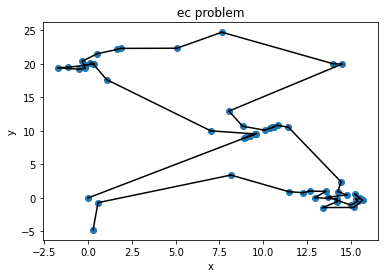

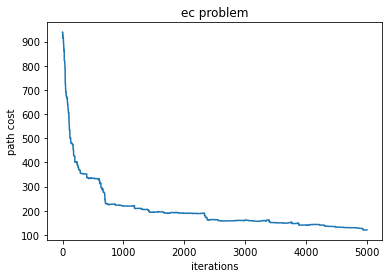

pathcost = 121.03187194918678


In [7]:
# to do this just need to change distance and pathdistance functions

# same exact code from before except change distance slightly
def distance(point1, point2):
    # only change that needs to be made is if the two points y has 10 in between them then add 10 to the distance
    if point1[1] < 10 and point2[1] > 10:
        return (( (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 )**.5)+10
    if point1[1] > 10 and point2[1] < 10:
        return (( (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 )**.5)+10
    return (( (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 )**.5)

def pathdistance(path):
    pathcost = 0
    for i in range(len(path)-1):
        pathcost += distance(points[path[i]], points[path[i+1]])
    return pathcost

# the code is already really modularized so this is easy
# the best method was temperature 2 reverse so we will run that at 5000 iterations
ecpath, eccost = simulated_annealing(all_nodes, 5000, temperature_2, reverse)
do_a_plot('ec problem', ecpath, eccost)
print('pathcost =', pathdistance(ecpath))

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Part 2: A Short Paper on Ethics and AI

Your task is to find a current event, project, or issue that relates to AI, and evaluate the ethics involved. You
must consider multiple points of view, not just your own as well as the implications that come from these points of
view.

We mentioned various ethical scenarios in class that can help you to consider your analysis. Remember in much of AI,
context is king. This can be the case in ethics also.  You may want to think about e.g. describing the types of competing loss/utility evaluations that might lead to different AI actions in the issue you choose.  You should also read about the 5 pillars of ethical standards here: https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

Consider the effects and impacts of AI on everyday life. Some examples to consider:
- AI and Justice
- AI and Medicine
- AI and Civil Rights
- AI and Warfare
- Defining AI
- AI Regulation
- AI and Human Jobs
- AI and Privacy
- Fair AI
- AI and Misinformation

You are welcome to discuss another topic providing there is enough AI content to make it relevant.

Paper in this cell *here*

In the past few years there have been vast improvements to creating autonomous vehicles. Autonomous vehicles are cars which are capable of driving with little to no human input. Currently we have only been able to move to Assisted Driving, where the steering, braking, and acceleration can be automated, but the driver controls all other functions. [2] The major reason for these improvements is due to the implementation of Computer Vision. Computer Vision uses Deep Learning to train networks that can classify objects given input data. Using cameras, radar, and LiDAR, the car receives input and then uses tons of data collected and classified previously to create a neural network that can detect and quantify everything in the car’s surroundings. With this you can then program what to do when it sees what objects, like a traffic light, pedestrian, other cars, and lanes. [4]
    
The major reason for using AI rather than an algorithm is that it is extremely difficult to implement something that can identify objects. There are many cases and variables that are too numerous to consider. With Deep Learning, the program can figure out what features are important and how it should classify things. This method also allows the classification to get better and better with the more classified data it receives, unlike how if you implemented an algorithm you would have to manually improve it continuously. 
    
Obviously people could continue to drive cars, however “the National Highway Traffic Safety Administration shows that 95% of all crashes occur due to driver error,” [2] showing that human error causes 95% of crashes. In 2018 there were 36,560 fatal car accidents. [5] Currently, from the National Highway Traffic Safety Administration, Tesla’s Autopilot has reduced accidents by almost 40%. [1] Autonomous vehicles would also improve efficiency and allow people to get around quicker. [1] Therefore AI is being tried since it could improve efficiency and save lives. 
    
Autonomous vehicles may sound great, but there are numerous ethical concerns to consider. First, there are concerns with the fairness and justice approach to ethics. Since there are not any clear federal safety regulations there are problems with the quality of the autonomous vehicles. Not all companies have the same standards and some autonomous vehicles may perform poorly and significantly increase risk to the user. There is also the problem of responsibility. If an autonomous car crashes who do you hold accountable? Who do you seek justice on when the vehicle fails? The programmer, manufacturer, algorithm itself, passenger, or no one? Secondly, from the rights approach of ethics, there is a clear concern with moral rights. Most people believe that their privacy should be respected. They do not want all of their data and information to be out for others to see. With autonomous vehicles manufacturers would have access to every location the passenger ever goes and what their surroundings are. This data will be saved on the cloud and could be leaked in numerous ways. Along these lines, there are concerns with hacking. Autonomous vehicles are quite complex and have many possible entry points for hackers. Hackers could then retrieve all of your information, or even inject bugs or exploits to create accidents. Many of the companies working on autonomous vehicles have not actually dealt with large scale attacks and do not have good security implementations. [3]
    
There are several benefits to autonomous vehicles also. With the utilitarian approach it is clear that one should implement autonomous vehicles since they drastically reduce the chances of fatalities. Also, from the common good approach, it benefits society as a whole and the community by reducing injuries. Autonomous vehicles could also greatly increase road speed, capacity, and transportation efficiency. With less congestion and greater road efficiency no new infrastructure would need to be built and some existing infrastructure could even be removed to increase building space. With the sort of person I want to be approach and somewhat the common good approach, it could also help the environment by reducing carbon emissions since autonomous vehicles are naturally compatible with electric vehicles and more likely to be electric. [1]
    
A proposed model suggests that in 2040 100% of new car sales will be fully autonomous, with the first fully autonomous car releasing in 2025. [2] Currently public opinion of autonomous cars is split with 47% of American drivers believing human operated vehicles are the safest option. [3] If 100% of cars do go autonomous by 2040, then public opinion of AI will be greatly changed. If people put their life in the hands of AI, then AI will become much more acceptable. This could mean that many more everyday tasks and menial jobs may be replaced by AI. Cars going autonomous also means that car insurance will be greatly reduced for consumers since accidents will no longer be under their control. But with the vehicle being out of the user’s control, the major problem of who is at fault when an accident does happen will become a major issue. Federal government will probably have to address the concerns and create clear laws defining who is responsible when programs harm people. This has major implications with all AI since whatever is decided in this case will probably be transferred to all cases. Currently no one is held accountable when a program causes harm. With federal decisions around the accountability of AI creators, programmers will either be held more accountable, or be completely alienated from their code. This could make programmers think more about what they code, or create careless programs without any ethical concerns since they will not be held accountable.
    
I believe autonomous vehicles could be fantastic and save many lives. However, I think ethically we are quite lacking and ill-prepared as a society. There are no clear laws that restrict autonomous vehicles in any way. There is also no foreseeable end to the debate on who should be accountable when AI goes wrong. Some believe manufacturers should be held accountable, others the programmers. It is really difficult to tell who is responsible. Do you charge a programmer for manslaughter because there was a bug in their code? This seems a bit extreme. If cars are used by millions of people then there will probably be at least one error. With large scale programs there are often several bugs. Also, due to the nature of Deep Learning, when an algorithm fails it is more due to the fact that the weights and decisions the AI placed on data was incorrect. Oftentimes programmers cannot tell how exactly Deep Learning algorithms are classifying images and have little control over the final decisions. I think technology is prepared and could do quite well, but as a society we are ill-prepared. There are no laws restricting AI or any regulations. There is no clear answer for what we do when someone’s AI causes accidents. Also, since there are not currently any regulations, some companies could release terrible autonomous vehicles that kill thousands, and could easily not be held accountable whatsoever since there are no clear laws surrounding AI and who is responsible for a machine’s failure.

Citations/bibliography *here*.  

References:

[1] Michael Krantz. 2017. The Case For Driverless Cars in Autonomous Vehicles. (October 2018) Retrieved November 8, 2020 from https://av-future.com/introduction/the-case-for-driverless-cars/

[2] Andrew Miller and Philippa Oldham. 2016. AUTONOMOUS AND DRIVERLESS CARS. Institution of Mechanical Engineers, Westminster, London. Retrieved from https://asf.imeche.org/docs/default-source/1-oscar/reports-policy-statements-and-documents/driverless-cars-case-study.pdf?sfvrsn=5b26c712_0

[3] Chris Neiger. 2018. The Case Against Driverless Cars. (September 2018). Retrieved November 8, 2020 from https://www.fool.com/investing/2018/09/28/the-case-against-driverless-cars.aspx

[4] George Seif. 2019. Your Guide to AI for Self-Driving Cars in 2020. (December 2019). Retrieved November 8, 2020 from https://towardsdatascience.com/your-guide-to-ai-for-self-driving-cars-in-2020-218289719619

[5] Wikipedia. 2020. WikipediA: the Free Encyclopedia. Retrieved from https://en.wikipedia.org/wiki/Motor_vehicle_fatality_rate_in_U.S._by_year

## Technical Details

Your paper should be approximately 1000 - 1500 words.

You will then need to collect sources surrounding this scenario. These can be newspaper articles, blog posts, book chapters etc. It is always good to have more than one source, now more than ever. You are free to choose your topic around what interests you, but I recommend that you read the grading rubric
below before making a final choice. Make sure you choose a topic on which you can write a paper to earn maximum
points.

I expect this assignment to use references appropriately and all references should be in the ACM Format (see:https://www.acm.org/publications/authors/reference-formatting).

For your consideration: preliminary rubric

- (a) [10 pts] Summarize your scenario. What is the problem that is being solved and what is the method used to solve it. This should include references to where you read about it. There maybe multiple articles on the same topic saying different things, you may wish to discuss both.
- (b) [6 pts] Describe the AI involved. Why was AI the solution? Is there a human solution? If so, why was the AI solution used.
- (c) [14 pts] Discuss the Ethical considerations of this scenario. If there is more than one side to the argument you should consider them all. (For almost all studies there will be multiple viewpoints). I recommend using the moral frameworks discussed in class to break down the scenario, either through analysing Moral Intensity of the five aspects of the Markkula Framework.
- (d) [6 pts] Discuss the Implications of this case study. How do the actions taken impact the future? What ethical debate can you forsee in the future?
- (e) [6 pts] Discuss how this case study relates to Ethics in AI as a whole. Is this case study representative? atypical? Somewhere in the middle? Why?
- (f) [4 pts] Conclude your paper, there should be a take home message. If you wish to include a personal opinion, this is the section in which to do that
There will also be points for:
- (g) [2 pt] Presentation, Spelling and Grammar
- (h) [2 pt] Appropriate Referencing

<br>

---
[Back to top](#top)
<a id='bot'></a>